In [1]:
from script import *

In [2]:
netflix = pd.read_csv('netflix.csv')
del netflix['Unnamed: 0']
netflix.columns= ['company','location','job-title','overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars','helpful_count','year']
fields = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
summary_netflix = netflix[fields].describe().transpose()

In [3]:
summary_netflix

,count,mean,std,min,25%,50%,75%,max
overall_ratings,321.0,3.744548,1.345192,1.0,3.0,4.0,5.0,5.0
work_balance_stars,321.0,3.628037,1.267635,1.0,3.0,4.0,5.0,5.0
culture_values_stars,321.0,3.677570,1.159039,1.0,3.5,3.5,5.0,5.0
carrer_opportunities_stars,321.0,3.362305,1.300810,1.0,2.5,3.5,4.5,5.0
comp_benefit_stars,321.0,4.376636,0.788461,1.0,4.0,4.5,5.0,5.0
senior_mangemnet_stars,321.0,3.595327,1.431567,1.0,2.5,4.0,5.0,5.0


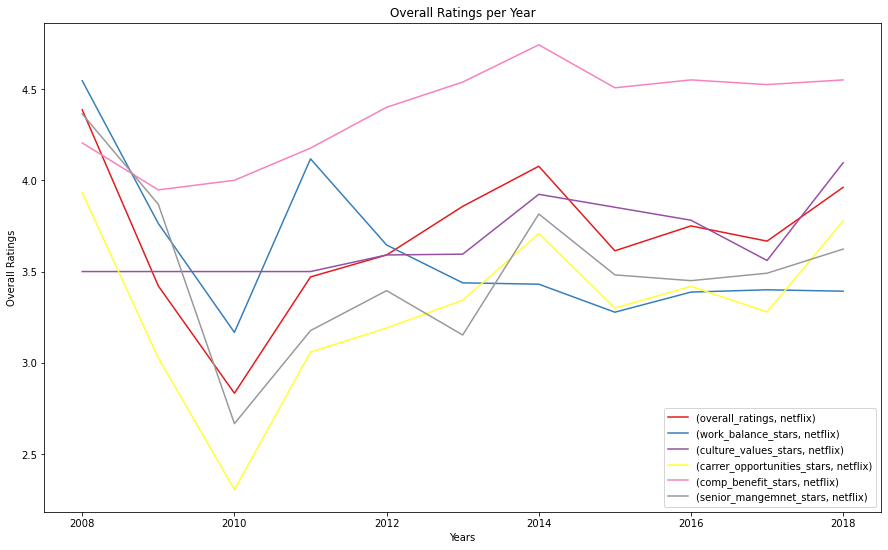

In [4]:
fig, ax = plt.subplots(figsize=(15,9))
keys = ['year','company']
lines = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
netflix.groupby(keys)[lines].mean().unstack().plot(ax=ax,colormap = 'Set1')
_ = plt.xlabel("Years")
_ = plt.ylabel("Overall Ratings")
_ = plt.title("Overall Ratings per Year")
_ = plt.legend()

In [5]:
corr_netflix = corr_matrix(netflix)
corr_netflix

,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,Job_code,Locations_code
overall_ratings,1.000000,0.680999,0.626473,0.800626,0.517923,0.810433,-0.512204,-0.348690,0.023851
work_balance_stars,0.680999,1.000000,0.463042,0.550973,0.310474,0.682019,-0.402915,-0.272429,-0.027971
culture_values_stars,0.626473,0.463042,1.000000,0.571339,0.405328,0.603752,-0.427046,-0.235981,-0.033759
carrer_opportunities_stars,0.800626,0.550973,0.571339,1.000000,0.464276,0.718294,-0.400537,-0.312944,0.086992
comp_benefit_stars,0.517923,0.310474,0.405328,0.464276,1.000000,0.433990,-0.120701,-0.125396,-0.044354
senior_mangemnet_stars,0.810433,0.682019,0.603752,0.718294,0.433990,1.000000,-0.455554,-0.360971,0.017529
helpful_count,-0.512204,-0.402915,-0.427046,-0.400537,-0.120701,-0.455554,1.000000,0.266848,-0.093875
Job_code,-0.348690,-0.272429,-0.235981,-0.312944,-0.125396,-0.360971,0.266848,1.000000,0.083848
Locations_code,0.023851,-0.027971,-0.033759,0.086992,-0.044354,0.017529,-0.093875,0.083848,1.000000


In [6]:
df_train_netflix = get_train_df(netflix)
df_train_netflix.head()

,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars
248,5,3,4,4,5
258,2,3,3,5,5
239,4,3,3,4,4
196,1,3,1,1,1
214,1,3,1,4,3


  0%|          | 6/1000000 [00:00<8:40:54, 32.00it/s] 



[('work_balance_stars', 'senior_mangemnet_stars'), ('culture_values_stars', 'carrer_opportunities_stars'), ('culture_values_stars', 'work_balance_stars'), ('carrer_opportunities_stars', 'work_balance_stars'), ('comp_benefit_stars', 'culture_values_stars'), ('comp_benefit_stars', 'work_balance_stars')]


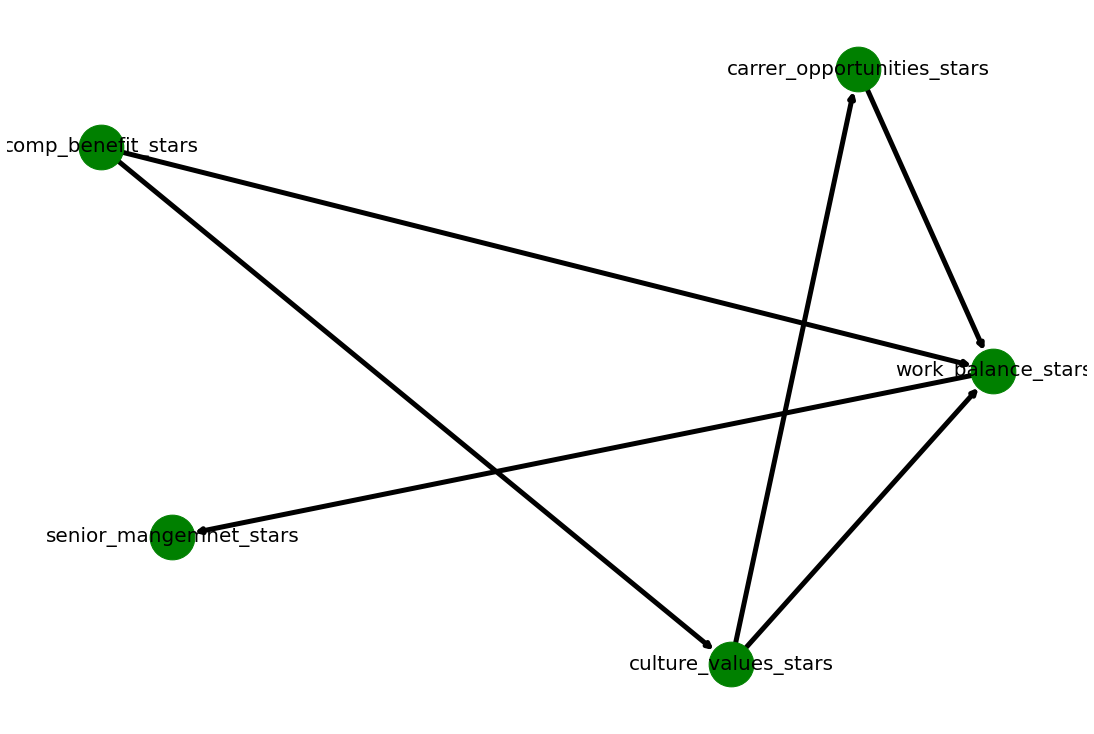

In [8]:
hc = HillClimbSearch(df_train_netflix, scoring_method=K2Score(df_train_netflix))  #use the training set to build the model
#The score to be optimized during structure estimation.  
#  Supported structure scores: k2score, bdeuscore, bicscore.
best_model = hc.estimate()
print(best_model)
edges = list(best_model.edges())
print(edges)
model = BayesianModel(edges)

%matplotlib inline
plt.figure(figsize=(15,10))

nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=2000,
        node_color="green", width = 5, font_size = 20)
plt.show()

In [10]:
model.fit(df_train_netflix, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

In [11]:
print(infer.query(variables=['work_balance_stars', 'carrer_opportunities_stars'], joint= True))

Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 282.67it/s]

+-----------------------+-------------------------------+------------------------------------------------------+
| work_balance_stars    | carrer_opportunities_stars    |   phi(work_balance_stars,carrer_opportunities_stars) |
+=======================+===============================+======================================================+
| work_balance_stars(1) | carrer_opportunities_stars(1) |                                               0.0482 |
+-----------------------+-------------------------------+------------------------------------------------------+
| work_balance_stars(1) | carrer_opportunities_stars(2) |                                               0.0029 |
+-----------------------+-------------------------------+------------------------------------------------------+
| work_balance_stars(1) | carrer_opportunities_stars(3) |                                               0.0324 |
+-----------------------+-------------------------------+---------------------------------------

In [12]:
print(infer.query(variables=['work_balance_stars', 'culture_values_stars'], joint= True))

Eliminating: comp_benefit_stars: 100%|██████████| 3/3 [00:00<00:00, 311.05it/s]

+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars    | culture_values_stars    |   phi(work_balance_stars,culture_values_stars) |
+=======================+=========================+================================================+
| work_balance_stars(1) | culture_values_stars(1) |                                         0.0468 |
+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars(1) | culture_values_stars(2) |                                         0.0000 |
+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars(1) | culture_values_stars(3) |                                         0.0497 |
+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars(1) | culture_values_stars(4) |                                        

In [13]:
print(infer.query(variables=['work_balance_stars', 'comp_benefit_stars'], joint= True))

Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 291.70it/s]

+-----------------------+-----------------------+----------------------------------------------+
| work_balance_stars    | comp_benefit_stars    |   phi(work_balance_stars,comp_benefit_stars) |
+=======================+=======================+==============================================+
| work_balance_stars(1) | comp_benefit_stars(1) |                                       0.0037 |
+-----------------------+-----------------------+----------------------------------------------+
| work_balance_stars(1) | comp_benefit_stars(2) |                                       0.0020 |
+-----------------------+-----------------------+----------------------------------------------+
| work_balance_stars(1) | comp_benefit_stars(3) |                                       0.0053 |
+-----------------------+-----------------------+----------------------------------------------+
| work_balance_stars(1) | comp_benefit_stars(4) |                                       0.0573 |
+-----------------------+-----

In [14]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'carrer_opportunities_stars': i}))

Finding Elimination Order: : 100%|██████████| 3/3 [00:00<00:00, 218.89it/s]


+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.3116 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.2751 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1653 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.1986 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0494 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0280 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 595.33it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0125 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.0564 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1144 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.4392 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.3775 |
+-----------------------+---------------------------+


In [16]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'culture_values_stars': i}))

Finding Elimination Order: : 100%|██████████| 3/3 [00:00<00:00, 238.04it/s]


+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.5672 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1375 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.2391 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0281 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0281 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0000 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

Eliminating: comp_benefit_stars: 100%|██████████| 3/3 [00:00<00:00, 410.58it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0032 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.0555 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1255 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.4308 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.3850 |
+-----------------------+---------------------------+


In [17]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'comp_benefit_stars': i}))

  0%|          | 0/3 [00:00<?, ?it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.3600 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1600 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1600 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.1600 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.1600 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0975 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

Eliminating: culture_values_stars: 100%|██████████| 3/3 [00:00<00:00, 529.03it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0525 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1111 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1895 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.2831 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.3639 |
+-----------------------+---------------------------+


In [21]:
causal_graph_netflix = """
digraph {
work_balance_stars;
carrer_opportunities_stars;
comp_benefit_stars;
senior_mangemnet_stars;
culture_values_stars -> carrer_opportunities_stars; 
carrer_opportunities_stars -> work_balance_stars; 
comp_benefit_stars -> culture_values_stars;
culture_values_stars -> work_balance_stars;
comp_benefit_stars -> culture_values_stars;
work_balance_stars -> senior_mangemnet_stars;
culture_values_stars -> work_balance_stars;
comp_benefit_stars -> work_balance_stars;
}
"""

In [26]:
#look to culture values as treatment variable

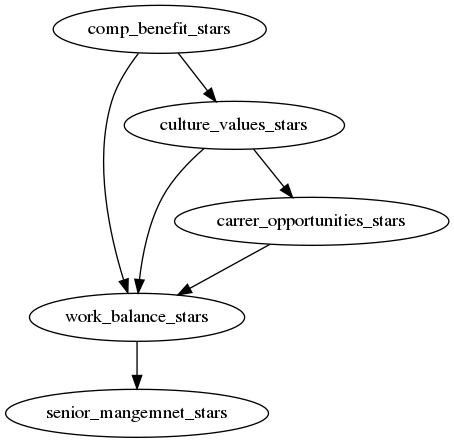

In [35]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='culture_values_stars'

model_netflix= CausalModel(
        data = df_train_netflix,
        graph=causal_graph_netflix.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
model_netflix.view_model()
display(Image(filename='causal_model_netflix.png'))

In [36]:
estimands = model_netflix.identify_effect()

In [37]:
estimate = model_netflix.estimate_effect(estimands,
                                 method_name = 'backdoor.linear_regression',
                                 test_significance=True, confidence_intervals=True)                           
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                               
──────────────────────(Expectation(work_balance_stars|comp_benefit_stars))
d[cultureᵥₐₗᵤₑₛ ₛₜₐᵣₛ]                                                    
Estimand assumption 1, Unconfoundedness: If U→{culture_values_stars} and U→work_balance_stars then P(work_balance_stars|culture_values_stars,comp_benefit_stars,U) = P(work_balance_stars|culture_values_stars,comp_benefit_stars)

## Realized estimand
b: work_balance_stars~culture_values_stars+comp_benefit_stars
Target units: ate

## Estimate
Mean value: 0.48522880470623875
p-value: [2.13134389e-06]
95.0% confidence interval: [[0.29457489 0.67588272]]



In [38]:
methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
for mode in methods:
    refutel(mode,model_netflix,estimands,estimate)

Refute: Add a Random Common Cause
Estimated effect:0.48522880470623875
New effect:0.4833838186243633

Refute: Use a subset of data
Estimated effect:0.48522880470623875
New effect:0.4913541289963161
p value:0.42

Refute: Use a Placebo Treatment
Estimated effect:0.48522880470623875
New effect:0.009853156316740578
p value:0.47



In [30]:
#look to comp-benefit as treatment variable

In [39]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='comp_benefit_stars'

model_netflix= CausalModel(
        data = df_train_netflix,
        graph=causal_graph_netflix.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
#model_netflix.view_model()
#display(Image(filename='causal_model_netflix.png'))

In [40]:
estimands = model_netflix.identify_effect()

In [41]:
estimate = model_netflix.estimate_effect(estimands,
                                 method_name = 'backdoor.linear_regression',
                                 test_significance=True, confidence_intervals=True)                           
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                           
─────────────────────(Expectation(work_balance_stars))
d[comp_benefit_stars]                                 
Estimand assumption 1, Unconfoundedness: If U→{comp_benefit_stars} and U→work_balance_stars then P(work_balance_stars|comp_benefit_stars,,U) = P(work_balance_stars|comp_benefit_stars,)

## Realized estimand
b: work_balance_stars~comp_benefit_stars
Target units: ate

## Estimate
Mean value: 0.5397860247408905
p-value: [0.00039134]
95.0% confidence interval: [[0.24832447 0.83124758]]



In [42]:
methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
for mode in methods:
    refutel(mode,model_netflix,estimands,estimate)

Refute: Add a Random Common Cause
Estimated effect:0.5397860247408905
New effect:0.5456768452886

Refute: Use a subset of data
Estimated effect:0.5397860247408905
New effect:0.5497350089063666
p value:0.48

Refute: Use a Placebo Treatment
Estimated effect:0.5397860247408905
New effect:-0.0003229896816783473
p value:0.49



In [43]:
#look to carrer opportunities as treatment variable

In [44]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='carrer_opportunities_stars'

model_netflix= CausalModel(
        data = df_train_netflix,
        graph=causal_graph_netflix.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
#model_netflix.view_model()
#display(Image(filename='causal_model_netflix.png'))

In [45]:
estimands = model_netflix.identify_effect()

In [46]:
estimate = model_netflix.estimate_effect(estimands,
                                 method_name = 'backdoor.linear_regression',
                                 test_significance=True, confidence_intervals=True)                           
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                
────────────────────────────(Expectation(work_balance_stars|comp_benefit_stars
d[carrerₒₚₚₒᵣₜᵤₙᵢₜᵢₑₛ ₛₜₐᵣₛ]                                                  

                       
,culture_values_stars))
                       
Estimand assumption 1, Unconfoundedness: If U→{carrer_opportunities_stars} and U→work_balance_stars then P(work_balance_stars|carrer_opportunities_stars,comp_benefit_stars,culture_values_stars,U) = P(work_balance_stars|carrer_opportunities_stars,comp_benefit_stars,culture_values_stars)

## Realized estimand
b: work_balance_stars~carrer_opportunities_stars+comp_benefit_stars+culture_values_stars
Target units: ate

## Estimate
Mean value: 0.25780699952704866
p-value: [0.01492422]
95.0% confidence interval: [[0.05140256 0.46421143]]



In [47]:
methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
for mode in methods:
    refutel(mode,model_netflix,estimands,estimate)

Refute: Add a Random Common Cause
Estimated effect:0.25780699952704866
New effect:0.2600017748807555

Refute: Use a subset of data
Estimated effect:0.25780699952704866
New effect:0.27732221282181385
p value:0.37

Refute: Use a Placebo Treatment
Estimated effect:0.25780699952704866
New effect:0.0025933101835875984
p value:0.45999999999999996

